#                                   COVID 19 DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [32]:
cd = pd.read_csv('cases_country.csv')

In [4]:
cd.shape

(201, 16)

In [5]:
cd.head(11)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2022-09-19 08:21:47,33.93911,67.709953,197240,7795,NaN,NaN,506.674559,NaN,NaN,3.952038,4,AFG,6597,33
1,Albania,2022-09-19 08:21:47,41.15330,20.168300,331583,3586,NaN,NaN,11522.100215,NaN,NaN,1.081479,8,ALB,5506,10
2,Algeria,2022-09-19 08:21:47,28.03390,1.659600,270609,6879,NaN,NaN,617.109609,NaN,NaN,2.542044,12,DZA,804,1
3,Andorra,2022-09-19 08:21:47,42.50630,1.521800,46147,155,NaN,NaN,59725.619621,NaN,NaN,0.335883,20,AND,172,1
4,Angola,2022-09-19 08:21:47,-11.20270,17.873900,103131,1917,NaN,NaN,313.789810,NaN,NaN,1.858801,24,AGO,495,0
5,Antarctica,2022-09-19 08:21:47,-71.94990,23.347000,11,0,NaN,NaN,NaN,NaN,NaN,0.000000,10,ATA,0,0
6,Antigua and Barbuda,2022-09-19 08:21:47,17.06080,-61.796400,9008,145,NaN,NaN,9198.594886,NaN,NaN,1.609680,28,ATG,113,1
7,Argentina,2022-09-19 08:21:47,-38.41610,-63.616700,9703938,129855,NaN,NaN,21470.895389,NaN,NaN,1.338168,32,ARG,45547,209
8,Armenia,2022-09-19 08:21:47,40.06910,45.038200,439302,8669,NaN,NaN,14825.086375,NaN,NaN,1.973358,51,ARM,8941,26
9,Australia,2022-09-19 08:21:47,-25.00000,133.000000,10159613,14763,NaN,NaN,39904.684658,NaN,NaN,0.145311,36,AUS,237364,1394


In [6]:
cd.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
count,199.000000,199.000000,2.010000e+02,2.010000e+02,0.0,0.0,196.000000,0.0,0.0,201.000000,201.000000,2.010000e+02,201.000000
mean,18.730091,21.601355,3.044619e+06,3.247000e+04,NaN,NaN,15566.375381,NaN,NaN,4.482596,531.935323,7.899364e+04,269.955224
std,24.708224,67.238747,9.168601e+06,1.061239e+05,NaN,NaN,17111.165724,NaN,NaN,42.272316,945.148116,3.487452e+05,1086.676444
min,-71.949900,-175.198200,1.000000e+00,0.000000e+00,NaN,NaN,0.003879,NaN,NaN,0.000000,4.000000,0.000000e+00,0.000000
25%,4.064892,-6.319850,3.718700e+04,3.720000e+02,NaN,NaN,1108.827378,NaN,NaN,0.475782,212.000000,1.950000e+02,0.000000
50%,17.357822,21.005900,2.887210e+05,3.163000e+03,NaN,NaN,9327.484236,NaN,NaN,1.067786,428.000000,2.047000e+03,7.000000
75%,40.106100,49.533194,1.660635e+06,1.688200e+04,NaN,NaN,25184.092873,NaN,NaN,1.947141,662.000000,2.198700e+04,105.000000
max,64.963100,178.065000,9.565828e+07,1.053420e+06,NaN,NaN,60557.487183,NaN,NaN,600.000000,9999.000000,3.505350e+06,12705.000000


In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       201 non-null    object 
 1   Last_Update          201 non-null    object 
 2   Lat                  199 non-null    float64
 3   Long_                199 non-null    float64
 4   Confirmed            201 non-null    int64  
 5   Deaths               201 non-null    int64  
 6   Recovered            0 non-null      float64
 7   Active               0 non-null      float64
 8   Incident_Rate        196 non-null    float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Mortality_Rate       201 non-null    float64
 12  UID                  201 non-null    int64  
 13  ISO3                 197 non-null    object 
 14  Cases_28_Days        201 non-null    int64  
 15  Deaths_28_Days       201 non-null    int

In [8]:
cd.isnull().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered              201
Active                 201
Incident_Rate            5
People_Tested          201
People_Hospitalized    201
Mortality_Rate           0
UID                      0
ISO3                     4
Cases_28_Days            0
Deaths_28_Days           0
dtype: int64

# DATA CLEANING

#### Drop columns where all values are missing

In [9]:
cd.dropna(axis=1, how='all' ,inplace=True)

#### Fill missing Incident_Rate with 0 or median

In [10]:
cd['Incident_Rate'] = cd['Incident_Rate'].fillna(0)


In [11]:
cd['ISO3'] = cd['ISO3'].fillna('UKN')

In [12]:
cd[['Lat', 'Long_']] = cd[['Lat', 'Long_']].fillna(0) 

In [13]:
cd.isna().sum()

Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Incident_Rate     0
Mortality_Rate    0
UID               0
ISO3              0
Cases_28_Days     0
Deaths_28_Days    0
dtype: int64

Now data is clean for analysis

# CHARTS FOR ANALYSIS 


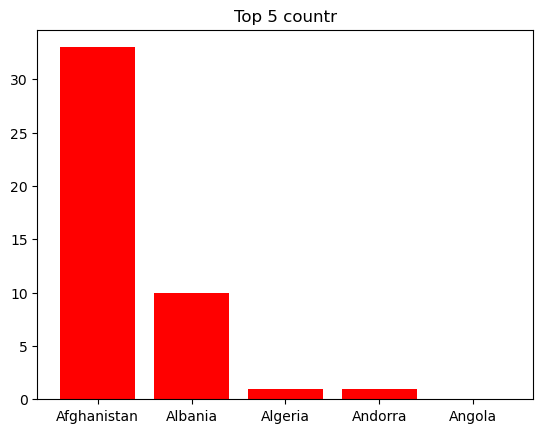

In [14]:

fig, ax = plt.subplots()

x = cd['Country_Region'].head(5)
y = cd['Deaths_28_Days'].head(5)

ax.bar(x, y, color = 'red')
ax.set_title('Top 5 countr')
plt.show()

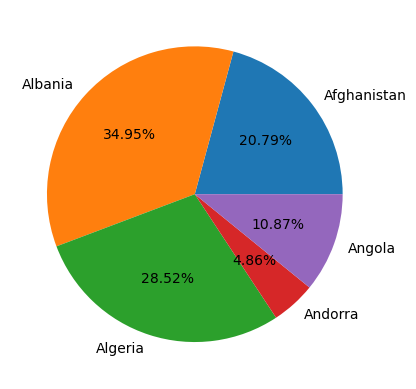

In [75]:
fig ,ax = plt.subplots()
plot1 = cd['Confirmed'].head(5)
plot2 = cd['Country_Region'].head(5)
ax.pie(plot1, labels=plot2, autopct='%2.2f%%')
plt.show()


In [16]:
cd.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2022-09-19 08:21:47,33.93911,67.709953,197240,7795,506.674559,3.952038,4,AFG,6597,33
1,Albania,2022-09-19 08:21:47,41.15330,20.168300,331583,3586,11522.100215,1.081479,8,ALB,5506,10
2,Algeria,2022-09-19 08:21:47,28.03390,1.659600,270609,6879,617.109609,2.542044,12,DZA,804,1
3,Andorra,2022-09-19 08:21:47,42.50630,1.521800,46147,155,59725.619621,0.335883,20,AND,172,1
4,Angola,2022-09-19 08:21:47,-11.20270,17.873900,103131,1917,313.789810,1.858801,24,AGO,495,0


In [17]:
cd.describe()

,Lat,Long_,Confirmed,Deaths,Incident_Rate,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
count,201.000000,201.000000,2.010000e+02,2.010000e+02,201.000000,201.000000,201.000000,2.010000e+02,201.000000
mean,18.543722,21.386416,3.044619e+06,3.247000e+04,15179.152113,4.482596,531.935323,7.899364e+04,269.955224
std,24.654911,66.936226,9.168601e+06,1.061239e+05,17069.836031,42.272316,945.148116,3.487452e+05,1086.676444
min,-71.949900,-175.198200,1.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,0.000000e+00,0.000000
25%,3.848000,-5.547100,3.718700e+04,3.720000e+02,736.572695,0.475782,212.000000,1.950000e+02,0.000000
50%,17.189900,20.939400,2.887210e+05,3.163000e+03,8980.303383,1.067786,428.000000,2.047000e+03,7.000000
75%,40.069100,48.516388,1.660635e+06,1.688200e+04,23898.540762,1.947141,662.000000,2.198700e+04,105.000000
max,64.963100,178.065000,9.565828e+07,1.053420e+06,60557.487183,600.000000,9999.000000,3.505350e+06,12705.000000


# Top 10 countries by key metrics

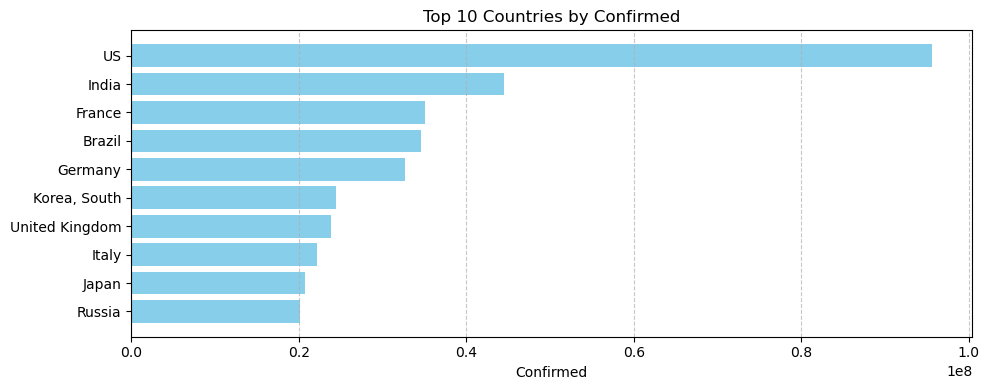

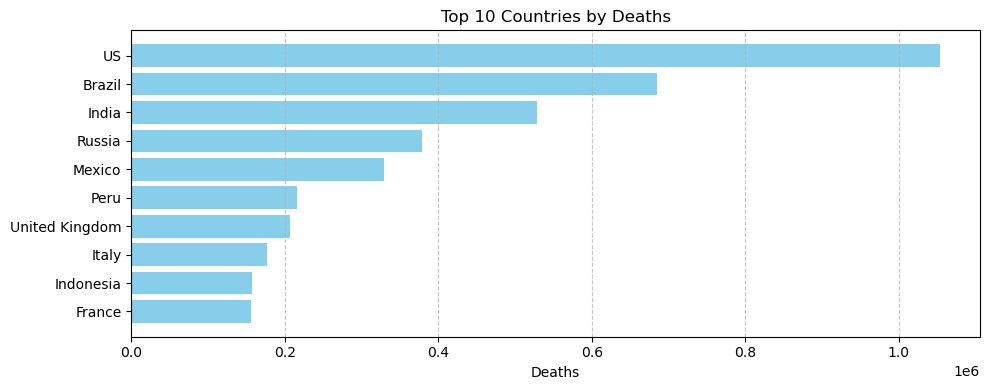

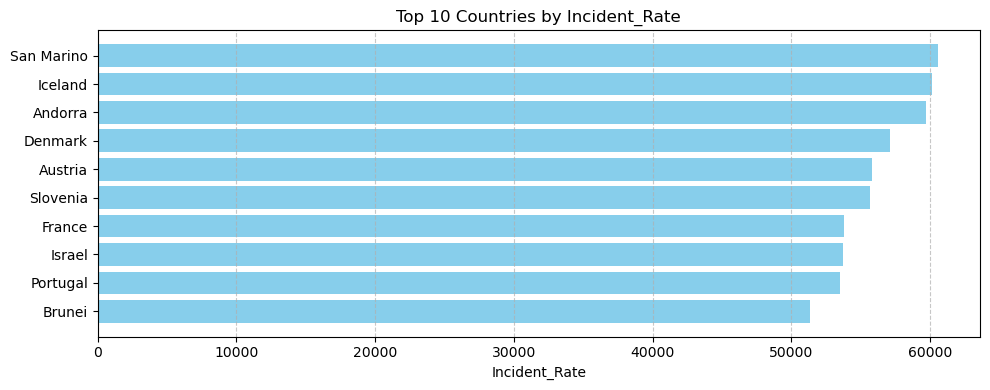

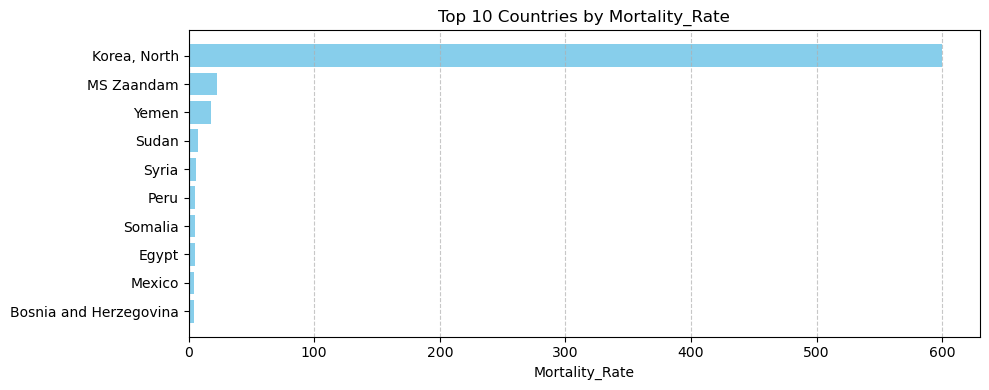

In [21]:
columns = ['Confirmed', 'Deaths', 'Incident_Rate', 'Mortality_Rate']

for col in columns:
    top10 = cd.nlargest(10, col)
    
    plt.figure(figsize=(10,4))
    plt.barh(top10['Country_Region'], top10[col], color='skyblue')
    plt.gca().invert_yaxis()  # Highest at top
    plt.title(f'Top 10 Countries by {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Geographical Analysis

## Heatmap of Spread (Lat, Long) and Choropleth map using Plotly

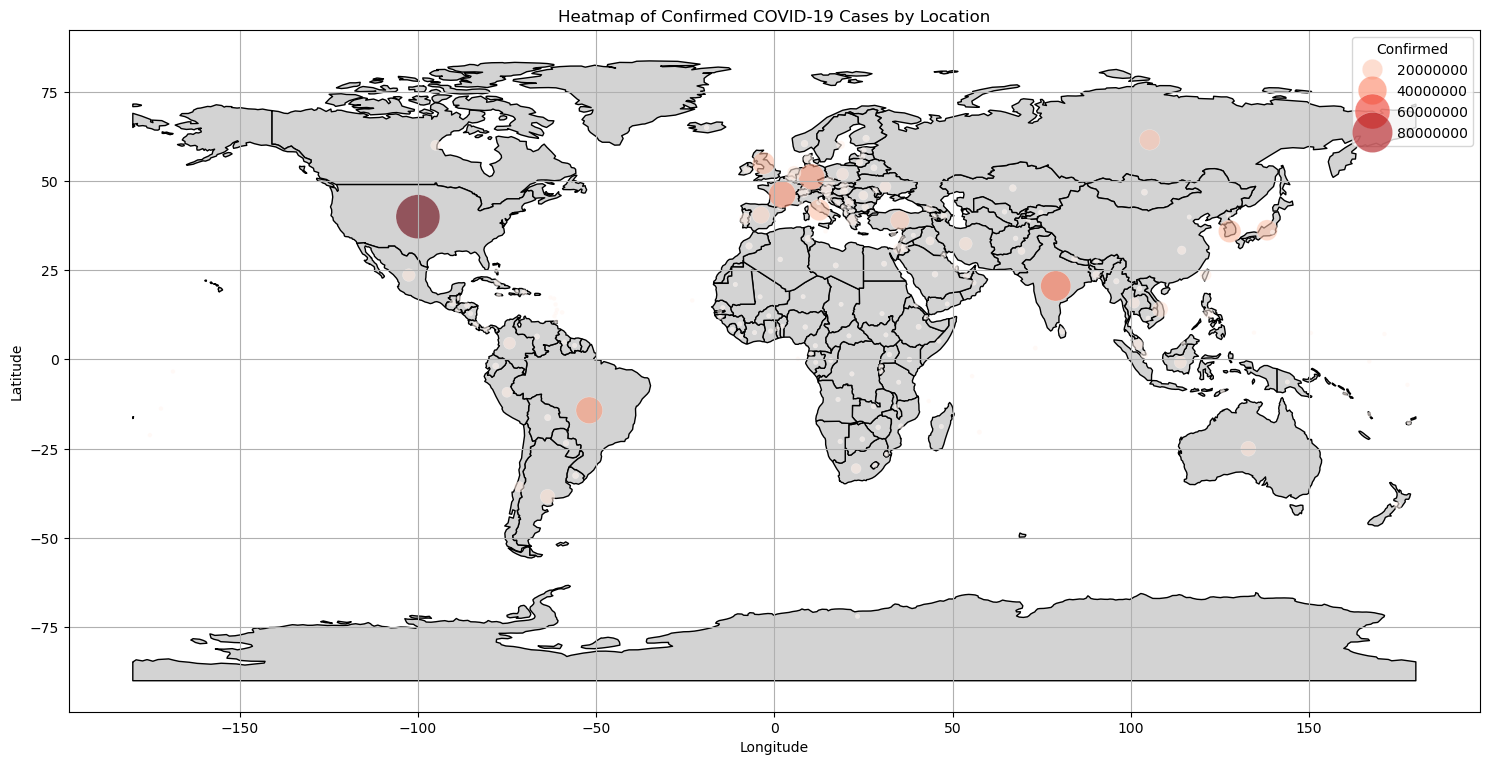

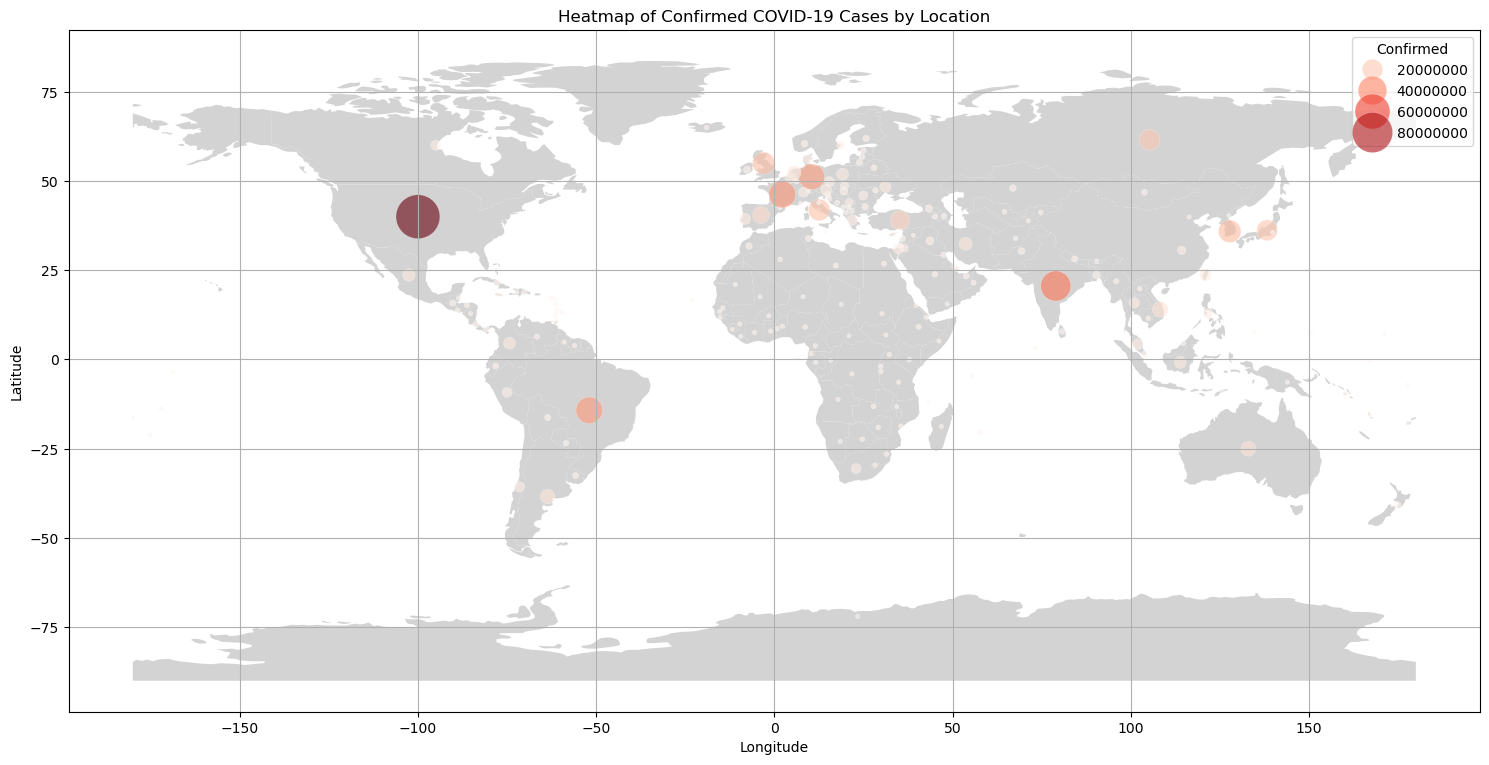

In [65]:
shapefile_path = r"C:\Users\91862\OneDrive\Desktop\Covid_19-Data-analysis\ne_110m_admin_0_countries (1)\ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")

# Add COVID scatter plot on top
sns.scatterplot(data=cd, x="Long_", y="Lat", size="Confirmed", hue="Confirmed",
                palette="Reds", sizes=(10, 1000), alpha=0.6, ax=ax)

plt.title("Heatmap of Confirmed COVID-19 Cases by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()
world = gpd.read_file(shapefile_path)

# Plot base map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgray")

# Plot COVID data
sns.scatterplot(data=cd, x="Long_", y="Lat", size="Confirmed", hue="Confirmed",
                palette="Reds", sizes=(10, 1000), alpha=0.6, ax=ax)

plt.title("Heatmap of Confirmed COVID-19 Cases by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
!pip install geopandas
!pip install geodatasets


In [61]:
import os

folder = r"C:\Users\91862\OneDrive\Desktop\Covid_19-Data-analysis\ne_110m_admin_0_countries (1)"
print(os.listdir(folder))


['ne_110m_admin_0_countries.cpg', 'ne_110m_admin_0_countries.dbf', 'ne_110m_admin_0_countries.prj', 'ne_110m_admin_0_countries.README.html', 'ne_110m_admin_0_countries.shp', 'ne_110m_admin_0_countries.shx', 'ne_110m_admin_0_countries.VERSION.txt']


## Ratio and Rate Analysis

In [67]:
cd['Recent_Case_Ratio'] = cd['Cases_28_Days'] / cd['Confirmed']
cd['Recent_Death_Ratio'] = cd['Deaths_28_Days'] / cd['Deaths']


In [69]:
cd['Recent_Case_Ratio']
cd['Recent_Death_Ratio']

0      0.004233
1      0.002789
2      0.000145
3      0.006452
4      0.000000
         ...   
196    0.002804
197         NaN
198    0.000464
199    0.000249
200    0.001072
Name: Recent_Death_Ratio, Length: 201, dtype: float64

## countries with low confirmed but high mortality

In [80]:
high_mortality = cd[(cd['Confirmed'] < 1000) & (cd['Mortality_Rate'] > 2)]
print(high_mortality[["Country_Region", "Confirmed", "Deaths", "Mortality_Rate"]])

    Country_Region  Confirmed  Deaths  Mortality_Rate
93    Korea, North          1       6      600.000000
107     MS Zaandam          9       2       22.222222


The above indicates underreporting of cases 

## Countries with rapidly declining cases

In [81]:
cd['decCase'] = cd['Cases_28_Days']/cd['Confirmed'] * 100

In [83]:
cd['decCase']

0      3.344656
1      1.660519
2      0.297108
3      0.372722
4      0.479972
         ...   
196    0.757149
197    0.000000
198    0.142474
199    0.335351
200    0.144749
Name: decCase, Length: 201, dtype: float64

In [89]:
declining = cd[cd["decCase"] < 1]  
print(declining[["Country_Region", "Cases_28_Days", "decCase"]])

           Country_Region  Cases_28_Days   decCase
2                 Algeria            804  0.297108
3                 Andorra            172  0.372722
4                  Angola            495  0.479972
5              Antarctica              0  0.000000
7               Argentina          45547  0.469366
..                    ...            ...       ...
196    West Bank and Gaza           5321  0.757149
197  Winter Olympics 2022              0  0.000000
198                 Yemen             17  0.142474
199                Zambia           1118  0.335351
200              Zimbabwe            372  0.144749

[109 rows x 3 columns]


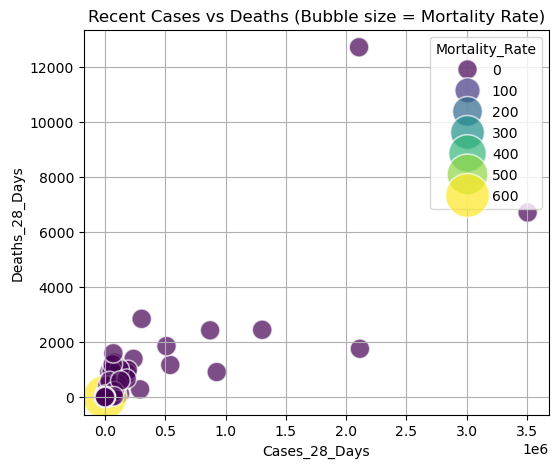

In [109]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=cd, x="Cases_28_Days", y="Deaths_28_Days", size="Mortality_Rate", hue="Mortality_Rate",
                sizes=(200, 1000), palette="viridis", alpha=0.7)
plt.title("Recent Cases vs Deaths (Bubble size = Mortality Rate)")
plt.grid(True)
plt.show()


## K-Means Clustering (Incident Rate, Mortality Rate)

c:\Users\91862\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


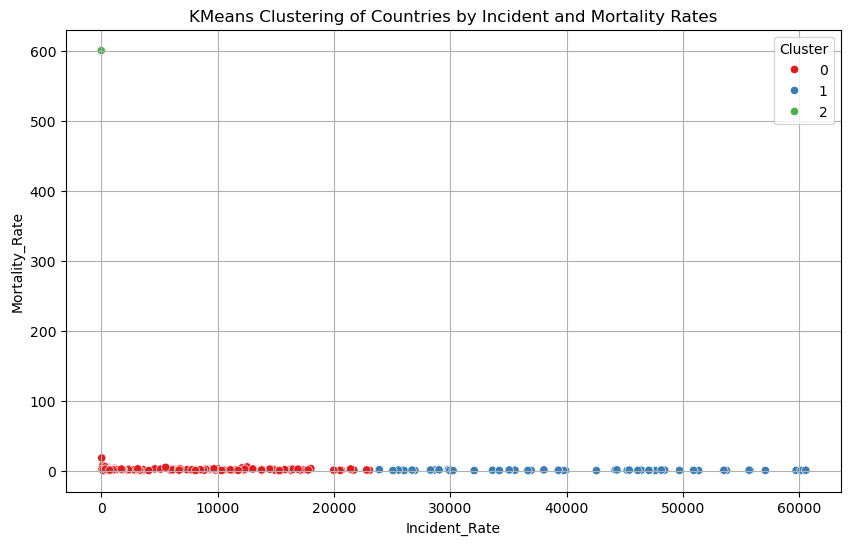

In [112]:
features = cd[["Incident_Rate", "Mortality_Rate"]].fillna(0)

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
cd["Cluster"] = kmeans.fit_predict(scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cd, x="Incident_Rate", y="Mortality_Rate", hue="Cluster", palette="Set1")
plt.title("KMeans Clustering of Countries by Incident and Mortality Rates")
plt.grid(True)
plt.show()
